TANG Kévin

M2 Data Science

Année 2023 - 2024

Expérimentation

---

# Decentralized IoB for Influencing IoT-based - Systems Behavior




In [1]:
import seaborn
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, RepeatVector, TimeDistributed, Dense
from keras.layers import Dropout

In [3]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

## Centralized system

### Global Active Power

#### Dataset and Data Pre-processing

In [ ]:
# Chargement du fichier
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Master_Info/M2/Stage/Test/household_power_consumption.txt', delimiter=';')


In [5]:
print(data.head())

         Date      Time Global_active_power Global_reactive_power  Voltage  \
0  16/12/2006  17:24:00               4.216                 0.418  234.840   
1  16/12/2006  17:25:00               5.360                 0.436  233.630   
2  16/12/2006  17:26:00               5.374                 0.498  233.290   
3  16/12/2006  17:27:00               5.388                 0.502  233.740   
4  16/12/2006  17:28:00               3.666                 0.528  235.680   

  Global_intensity Sub_metering_1 Sub_metering_2  Sub_metering_3  
0           18.400          0.000          1.000            17.0  
1           23.000          0.000          1.000            16.0  
2           23.000          0.000          2.000            17.0  
3           23.000          0.000          1.000            17.0  
4           15.800          0.000          1.000            17.0  


In [6]:
nb_lignes = data.shape[0]
nb_colonnes = data.shape[1]
labels = data.columns

print("Nombre de lignes :", nb_lignes)
print("Nombre de variables :", nb_colonnes)
print(labels)

Nombre de lignes : 2075259
Nombre de variables : 9
Index(['Date', 'Time', 'Global_active_power', 'Global_reactive_power',
       'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')


In [7]:
data.dtypes

Date                      object
Time                      object
Global_active_power       object
Global_reactive_power     object
Voltage                   object
Global_intensity          object
Sub_metering_1            object
Sub_metering_2            object
Sub_metering_3           float64
dtype: object

In [8]:
colonnes_to_convert = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']

In [9]:
data[colonnes_to_convert] = data[colonnes_to_convert].apply(pd.to_numeric, errors='coerce')

In [10]:
nombre_lignes_nulles = data.isnull().any(axis=1).sum()
pourcentage_lignes_nulles = (nombre_lignes_nulles / nb_lignes) * 100

print("Pourcentage de lignes contenant des valeurs nulles:", pourcentage_lignes_nulles, "%")

Pourcentage de lignes contenant des valeurs nulles: 1.2518437457686005 %


In [11]:
# Convertir la colonne 'dates' en objet datetime
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')

In [12]:
data['Date'] = data['Date'].apply(lambda x: x.strftime('%Y-%m-%d'))

In [13]:
# Combinez les colonnes "Date" et "Time" en une seule colonne datetime
data['datetime'] = pd.to_datetime(data['Date'] + ' ' + data['Time'])

data_date = data['Date']
data_time = data['Time']
data_datetime = data['datetime']

data.drop(['Date', 'Time'], axis=1, inplace=True)

# Mettre les données à une fréquence horaire
data = data.resample('H', on='datetime').mean()

In [ ]:
data

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-16 17:00:00,4.222889,0.229000,234.643889,18.100000,0.0,0.527778,16.861111
2006-12-16 18:00:00,3.632200,0.080033,234.580167,15.600000,0.0,6.716667,16.866667
2006-12-16 19:00:00,3.400233,0.085233,233.232500,14.503333,0.0,1.433333,16.683333
2006-12-16 20:00:00,3.268567,0.075100,234.071500,13.916667,0.0,0.000000,16.783333
2006-12-16 21:00:00,3.056467,0.076667,237.158667,13.046667,0.0,0.416667,17.216667
...,...,...,...,...,...,...,...
2010-11-26 17:00:00,1.725900,0.061400,237.069667,7.216667,0.0,0.000000,12.866667
2010-11-26 18:00:00,1.573467,0.053700,237.531833,6.620000,0.0,0.000000,0.000000
2010-11-26 19:00:00,1.659333,0.060033,236.741000,7.056667,0.0,0.066667,0.000000


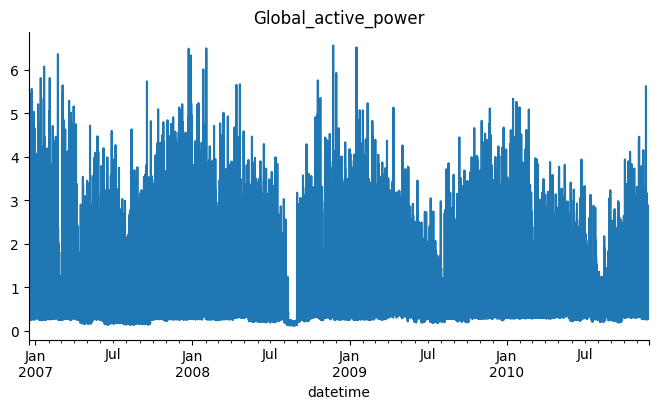

In [ ]:
from matplotlib import pyplot as plt
data['Global_active_power'].plot(kind='line', figsize=(8, 4), title='Global_active_power')
plt.gca().spines[['top', 'right']].set_visible(False)

<Axes: ylabel='datetime'>

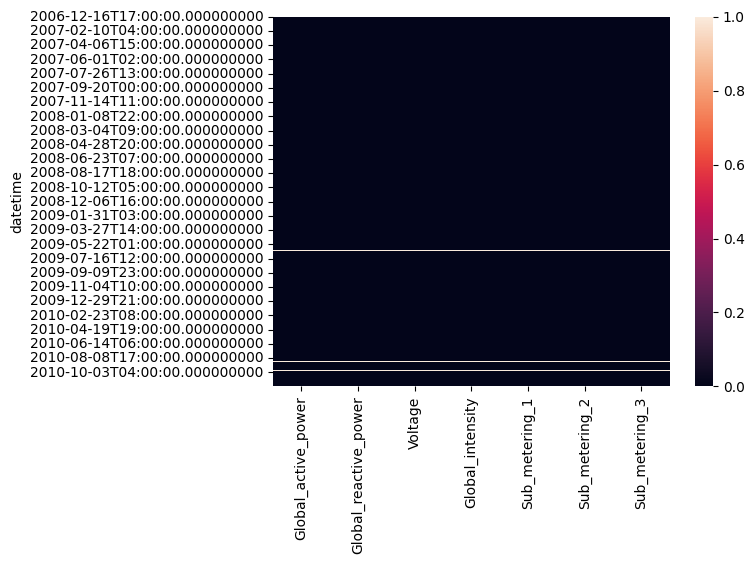

In [ ]:
#Identifie les valeurs manquantes
seaborn.heatmap(data.isna())

In [14]:
data.fillna(data.mean(), inplace=True)

In [15]:
# Normalisation
scaler = MinMaxScaler()
data[colonnes_to_convert] = scaler.fit_transform(data[colonnes_to_convert])

In [16]:
data

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-16 17:00:00,0.636816,0.295738,0.337945,0.631157,0.0,0.011366,0.782418
2006-12-16 18:00:00,0.545045,0.103358,0.335501,0.541487,0.0,0.144652,0.782676
2006-12-16 19:00:00,0.509006,0.110073,0.283802,0.502152,0.0,0.030869,0.774169
2006-12-16 20:00:00,0.488550,0.096987,0.315987,0.481110,0.0,0.000000,0.778809
2006-12-16 21:00:00,0.455597,0.099010,0.434417,0.449904,0.0,0.008973,0.798917
...,...,...,...,...,...,...,...
2010-11-26 17:00:00,0.248876,0.079294,0.431003,0.240794,0.0,0.000000,0.597061
2010-11-26 18:00:00,0.225194,0.069350,0.448732,0.219393,0.0,0.000000,0.000000
2010-11-26 19:00:00,0.238534,0.077529,0.418395,0.235055,0.0,0.001436,0.000000


In [ ]:
y = data['Global_active_power']

In [ ]:
y

datetime
2006-12-16 17:00:00    0.636816
2006-12-16 18:00:00    0.545045
2006-12-16 19:00:00    0.509006
2006-12-16 20:00:00    0.488550
2006-12-16 21:00:00    0.455597
                         ...   
2010-11-26 17:00:00    0.248876
2010-11-26 18:00:00    0.225194
2010-11-26 19:00:00    0.238534
2010-11-26 20:00:00    0.161531
2010-11-26 21:00:00    0.125948
Freq: H, Name: Global_active_power, Length: 34589, dtype: float64

In [ ]:
X = data.drop(columns=['Global_active_power'])

In [ ]:
X

,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,
2006-12-16 17:00:00,0.295738,0.337945,0.631157,0.0,0.011366,0.782418
2006-12-16 18:00:00,0.103358,0.335501,0.541487,0.0,0.144652,0.782676
2006-12-16 19:00:00,0.110073,0.283802,0.502152,0.0,0.030869,0.774169
2006-12-16 20:00:00,0.096987,0.315987,0.481110,0.0,0.000000,0.778809
2006-12-16 21:00:00,0.099010,0.434417,0.449904,0.0,0.008973,0.798917
...,...,...,...,...,...,...
2010-11-26 17:00:00,0.079294,0.431003,0.240794,0.0,0.000000,0.597061
2010-11-26 18:00:00,0.069350,0.448732,0.219393,0.0,0.000000,0.000000
2010-11-26 19:00:00,0.077529,0.418395,0.235055,0.0,0.001436,0.000000


In [ ]:
test_size = 8309 / data.shape[0]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

In [ ]:
X_train

,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,
2010-06-17 09:00:00,0.158760,0.635478,0.032640,0.000000,0.008256,0.034029
2008-07-21 22:00:00,0.173483,0.622563,0.160210,0.166437,0.005025,0.197989
2010-10-25 13:00:00,0.075721,0.645472,0.028336,0.000000,0.000000,0.030162
2008-06-05 19:00:00,0.289195,0.368377,0.197872,0.217436,0.007897,0.029389
2010-04-10 18:00:00,0.247180,0.587072,0.302367,0.163336,0.025485,0.886311
...,...,...,...,...,...,...
2008-11-17 19:00:00,0.147310,0.402736,0.184959,0.000000,0.006461,0.000000
2007-09-03 18:00:00,0.145372,0.500285,0.044118,0.036527,0.000000,0.000000
2008-03-30 21:00:00,0.110762,0.484805,0.441774,0.137491,0.000000,0.759474


In [ ]:
y_train

datetime
2010-06-17 09:00:00    0.027458
2008-07-21 22:00:00    0.164053
2010-10-25 13:00:00    0.030368
2008-06-05 19:00:00    0.192096
2010-04-10 18:00:00    0.315423
                         ...   
2008-11-17 19:00:00    0.187725
2007-09-03 18:00:00    0.041482
2008-03-30 21:00:00    0.455478
2007-01-21 13:00:00    0.410143
2008-10-04 20:00:00    0.096154
Name: Global_active_power, Length: 26280, dtype: float64

In [ ]:
X_test

,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,
2009-12-01 13:00:00,0.114206,0.623657,0.107365,0.0,0.005743,0.402166
2009-02-24 07:00:00,0.107878,0.572674,0.261956,0.0,0.000000,0.440062
2008-03-27 04:00:00,0.116143,0.665855,0.026901,0.0,0.008615,0.000000
2007-09-24 09:00:00,0.182221,0.421457,0.170732,0.0,0.023690,0.795824
2007-05-09 12:00:00,0.132114,0.357457,0.052009,0.0,0.012204,0.000000
...,...,...,...,...,...,...
2008-08-04 15:00:00,0.099182,0.541338,0.014108,0.0,0.001795,0.030162
2007-04-07 16:00:00,0.069049,0.587232,0.070301,0.0,0.003589,0.000000
2008-12-12 05:00:00,0.108739,0.776721,0.024510,0.0,0.000000,0.000000


In [ ]:
y_test

datetime
2009-12-01 13:00:00    0.110914
2009-02-24 07:00:00    0.273496
2008-03-27 04:00:00    0.026888
2007-09-24 09:00:00    0.176094
2007-05-09 12:00:00    0.044035
                         ...   
2008-08-04 15:00:00    0.011901
2007-04-07 16:00:00    0.070152
2008-12-12 05:00:00    0.023993
2007-03-17 11:00:00    0.195545
2009-08-10 18:00:00    0.163489
Name: Global_active_power, Length: 8309, dtype: float64

#### Sequence-to-Sequence Autoencoder

In [ ]:
# Convertir X_train en tableau numpy
X_train_array = X_train.values

# Appliquer reshape sur le tableau numpy
train_X = X_train_array.reshape((X_train_array.shape[0], 1, X_train_array.shape[1]))

In [ ]:
train_X.shape

(26280, 1, 6)

In [ ]:
# Convertir X_test en tableau numpy
X_test_array = X_test.values

# Appliquer reshape sur le tableau numpy
test_X = X_test_array.reshape((X_test_array.shape[0], 1, X_test_array.shape[1]))

In [ ]:
test_X.shape

(8309, 1, 6)

In [ ]:
model = Sequential()
model.add(LSTM(100, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

history = model.fit(train_X, y_train, epochs=20, batch_size=32, validation_data=(test_X, y_test), verbose=2, shuffle=False)

Epoch 1/20
822/822 - 8s - loss: 0.0018 - val_loss: 2.8037e-05 - 8s/epoch - 10ms/step
Epoch 2/20
822/822 - 3s - loss: 1.5757e-04 - val_loss: 1.6683e-05 - 3s/epoch - 4ms/step
Epoch 3/20
822/822 - 3s - loss: 1.1926e-04 - val_loss: 1.1192e-05 - 3s/epoch - 3ms/step
Epoch 4/20
822/822 - 4s - loss: 9.7367e-05 - val_loss: 3.2101e-05 - 4s/epoch - 5ms/step
Epoch 5/20
822/822 - 4s - loss: 8.2222e-05 - val_loss: 2.9730e-05 - 4s/epoch - 4ms/step
Epoch 6/20
822/822 - 3s - loss: 7.2850e-05 - val_loss: 2.5323e-05 - 3s/epoch - 4ms/step
Epoch 7/20
822/822 - 3s - loss: 6.9344e-05 - val_loss: 1.7918e-05 - 3s/epoch - 4ms/step
Epoch 8/20
822/822 - 4s - loss: 6.9536e-05 - val_loss: 1.2057e-05 - 4s/epoch - 5ms/step
Epoch 9/20
822/822 - 3s - loss: 6.6175e-05 - val_loss: 1.2190e-05 - 3s/epoch - 4ms/step
Epoch 10/20
822/822 - 3s - loss: 6.7273e-05 - val_loss: 1.2115e-05 - 3s/epoch - 3ms/step
Epoch 11/20
822/822 - 3s - loss: 6.8821e-05 - val_loss: 1.3287e-05 - 3s/epoch - 4ms/step
Epoch 12/20
822/822 - 4s - loss: 

In [ ]:
predictions = model.predict(test_X)

260/260 [==============================] - 1s 2ms/step


In [ ]:
predictions

array([[0.11022712],
       [0.27551782],
       [0.02049243],
       ...,
       [0.01863229],
       [0.19880532],
       [0.16692528]], dtype=float32)

In [ ]:
y_test

datetime
2009-12-01 13:00:00    0.110914
2009-02-24 07:00:00    0.273496
2008-03-27 04:00:00    0.026888
2007-09-24 09:00:00    0.176094
2007-05-09 12:00:00    0.044035
                         ...   
2008-08-04 15:00:00    0.011901
2007-04-07 16:00:00    0.070152
2008-12-12 05:00:00    0.023993
2007-03-17 11:00:00    0.195545
2009-08-10 18:00:00    0.163489
Name: Global_active_power, Length: 8309, dtype: float64

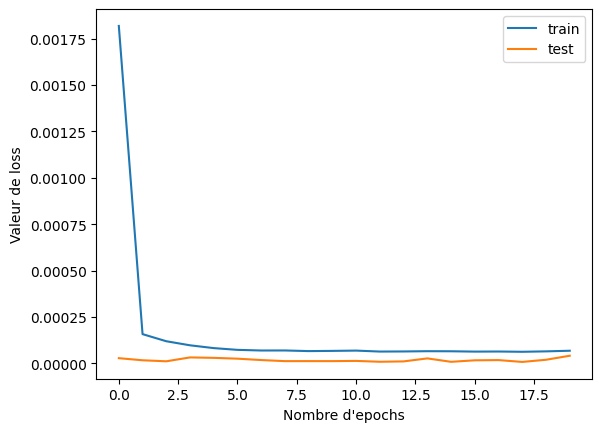

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('Valeur de loss')
plt.xlabel('Nombre d\'epochs')
plt.legend(['train', 'test'])

plt.show()


In [ ]:
index_str = y_test.index.strftime('%Y-%m-%d %H:%M:%S')
index_predictions = np.column_stack((index_str, predictions))

In [ ]:
index_predictions

array([['2009-12-01 13:00:00', 0.11429938673973083],
       ['2009-02-24 07:00:00', 0.27231156826019287],
       ['2008-03-27 04:00:00', 0.029104873538017273],
       ...,
       ['2008-12-12 05:00:00', 0.027978189289569855],
       ['2007-03-17 11:00:00', 0.19765391945838928],
       ['2009-08-10 18:00:00', 0.1663837432861328]], dtype=object)

In [ ]:
reels_predictions = np.column_stack((index_predictions, y_test))

In [ ]:
reels_predictions

array([['2009-12-01 13:00:00', 0.11429938673973083, 0.11091374238720633],
       ['2009-02-24 07:00:00', 0.27231156826019287, 0.27349608484898696],
       ['2008-03-27 04:00:00', 0.029104873538017273,
        0.026888179972656082],
       ...,
       ['2008-12-12 05:00:00', 0.027978189289569855,
        0.023993246882379738],
       ['2007-03-17 11:00:00', 0.19765391945838928, 0.19554522102995398],
       ['2009-08-10 18:00:00', 0.1663837432861328, 0.16348862741848613]],
      dtype=object)

In [ ]:
df = pd.DataFrame(reels_predictions)

In [ ]:
df

,0,1,2
0,2009-12-01 13:00:00,0.114299,0.110914
1,2009-02-24 07:00:00,0.272312,0.273496
2,2008-03-27 04:00:00,0.029105,0.026888
3,2007-09-24 09:00:00,0.175507,0.176094
4,2007-05-09 12:00:00,0.051121,0.044035
...,...,...,...
8304,2008-08-04 15:00:00,0.01565,0.011901
8305,2007-04-07 16:00:00,0.074287,0.070152
8306,2008-12-12 05:00:00,0.027978,0.023993
8307,2007-03-17 11:00:00,0.197654,0.195545


In [ ]:
saved_power = 0

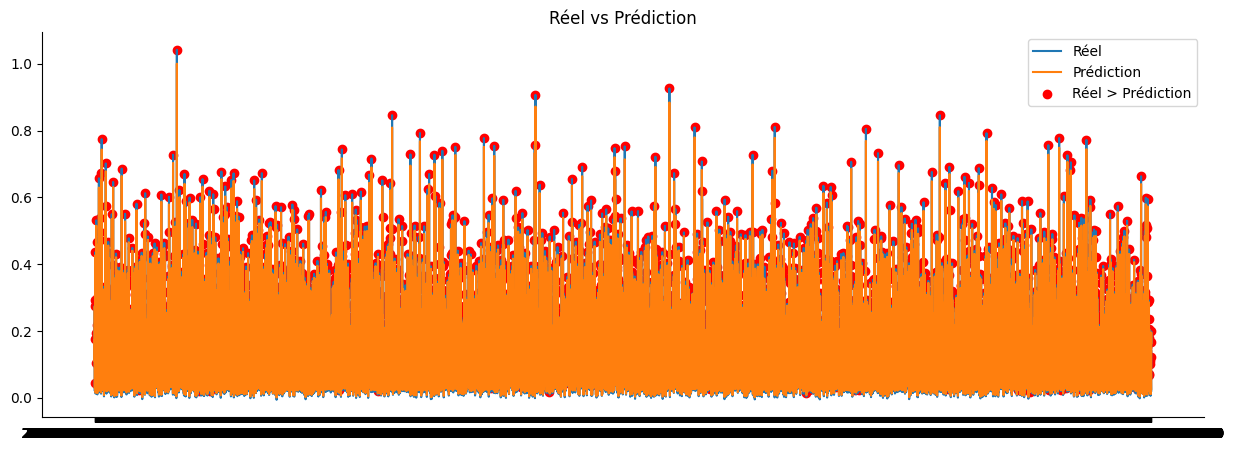

In [ ]:
plt.figure(figsize=(15, 5))
plt.plot(df[0], df[1], label='Réel')
plt.plot(df[0], df[2], label='Prédiction')

# Trouver les indices où la courbe réelle est supérieure à la prédiction
indices_sup = df[1] > df[2]

# pour calculer le saved power
diff = df[1][indices_sup] - df[2][indices_sup]
saved_power += diff.sum()

# Afficher des points rouges sur la courbe réelle aux positions où elle est supérieure à la prédiction
plt.scatter(df[0][indices_sup], df[1][indices_sup], color='red', label='Réel > Prédiction')

plt.legend()
plt.title('Réel vs Prédiction')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()

In [ ]:
nb_alerts = sum(indices_sup)
print("Nombre d\'alertes :", nb_alerts)
print("Eneergie économisée :",saved_power)

Nombre d'alertes : 3947
Eneergie économisée : 22.909257997038367


In [ ]:
df['datetime'] = pd.to_datetime(df[0])

# Séparer la colonne "datetime" en année, mois, jour et heure
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['day'] = df['datetime'].dt.day
df['hour'] = df['datetime'].dt.hour


In [ ]:
df

,0,1,2,datetime,year,month,day,hour
0,2009-12-01 13:00:00,0.114299,0.110914,2009-12-01 13:00:00,2009,12,1,13
1,2009-02-24 07:00:00,0.272312,0.273496,2009-02-24 07:00:00,2009,2,24,7
2,2008-03-27 04:00:00,0.029105,0.026888,2008-03-27 04:00:00,2008,3,27,4
3,2007-09-24 09:00:00,0.175507,0.176094,2007-09-24 09:00:00,2007,9,24,9
4,2007-05-09 12:00:00,0.051121,0.044035,2007-05-09 12:00:00,2007,5,9,12
...,...,...,...,...,...,...,...,...
8304,2008-08-04 15:00:00,0.01565,0.011901,2008-08-04 15:00:00,2008,8,4,15
8305,2007-04-07 16:00:00,0.074287,0.070152,2007-04-07 16:00:00,2007,4,7,16
8306,2008-12-12 05:00:00,0.027978,0.023993,2008-12-12 05:00:00,2008,12,12,5
8307,2007-03-17 11:00:00,0.197654,0.195545,2007-03-17 11:00:00,2007,3,17,11


In [ ]:
means = df.groupby(['month', 'day', 'hour'])[[1, 2]].mean()
print(means)

                       1         2
month day hour                    
1     1   0     0.224027  0.220427
          1     0.153831  0.148530
          2     0.179061  0.177130
          3     0.073127  0.062534
          5     0.078418  0.078365
...                  ...       ...
12    31  18    0.350661  0.355233
          19    0.466297  0.470600
          20    0.417147  0.422355
          21    0.224209  0.224396
          22    0.262842  0.264117

[5798 rows x 2 columns]


In [ ]:
df_means = pd.DataFrame(means)

In [ ]:
df_means

1         2
month day hour                    
1     1   0     0.224027  0.220427
          1     0.153831  0.148530
          2     0.179061  0.177130
          3     0.073127  0.062534
          5     0.078418  0.078365
...                  ...       ...
12    31  18    0.350661  0.355233
          19    0.466297  0.470600
          20    0.417147  0.422355
          21    0.224209  0.224396
          22    0.262842  0.264117

[5798 rows x 2 columns]

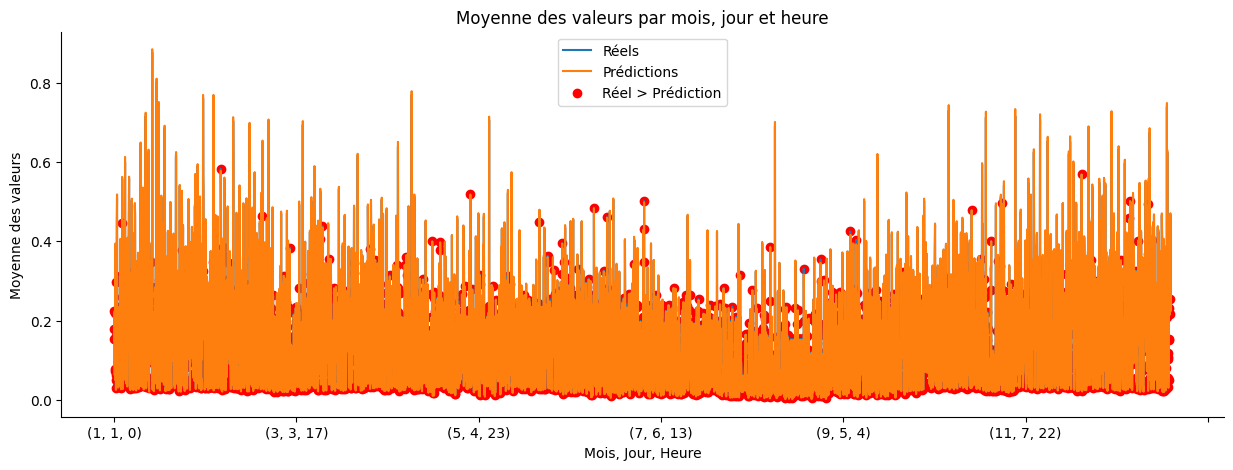

In [ ]:
df_means[1].plot(kind='line', figsize=(15, 5), label='Réels')
df_means[2].plot(kind='line', figsize=(15, 5), label='Prédictions')

# Réinitialiser l'index de df_means pour le rendre numérique
df_means_reset = df_means.reset_index()

indices_sup = df_means_reset[1] > df_means_reset[2]
plt.scatter(df_means_reset.index[indices_sup], df_means_reset[1][indices_sup], color='red', label='Réel > Prédiction')

plt.title('Moyenne des valeurs par mois, jour et heure')
plt.xlabel('Mois, Jour, Heure')
plt.ylabel('Moyenne des valeurs')
plt.legend()
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()

#### Evaluation

In [ ]:
print("Score RMSE :", np.sqrt(mean_squared_error(y_test, predictions)))
print("Score MAE :", mean_absolute_error(y_test, predictions))

Score RMSE : 0.004277321824065124
Score MAE : 0.0033791376618009477


### Sub Metering 1

#### Dataset et Pre-processing

In [ ]:
# Charger les données
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Master_Info/M2/Stage/Test/household_power_consumption.txt', delimiter=';')

In [ ]:
nb_lignes = data.shape[0]
nb_colonnes = data.shape[1]
labels = data.columns

print("Nombre de lignes :", nb_lignes)
print("Nombre de variables :", nb_colonnes)
print(labels)

Nombre de lignes : 2075259
Nombre de variables : 9
Index(['Date', 'Time', 'Global_active_power', 'Global_reactive_power',
       'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')


In [ ]:
colonnes_to_convert = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']
data[colonnes_to_convert] = data[colonnes_to_convert].apply(pd.to_numeric, errors='coerce')

In [ ]:
nombre_lignes_nulles = data.isnull().any(axis=1).sum()
pourcentage_lignes_nulles = (nombre_lignes_nulles / nb_lignes) * 100
print("Pourcentage de lignes contenant des valeurs nulles:", pourcentage_lignes_nulles, "%")

Pourcentage de lignes contenant des valeurs nulles: 1.2518437457686005 %


In [ ]:
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')
data['Date'] = data['Date'].apply(lambda x: x.strftime('%Y-%m-%d'))

In [ ]:
data['datetime'] = pd.to_datetime(data['Date'] + ' ' + data['Time'])

data_date = data['Date']
data_time = data['Time']
data_datetime = data['datetime']

data.drop(['Date', 'Time'], axis=1, inplace=True)

# Mettre les données à une fréquence horaire
data = data.resample('H', on='datetime').mean()

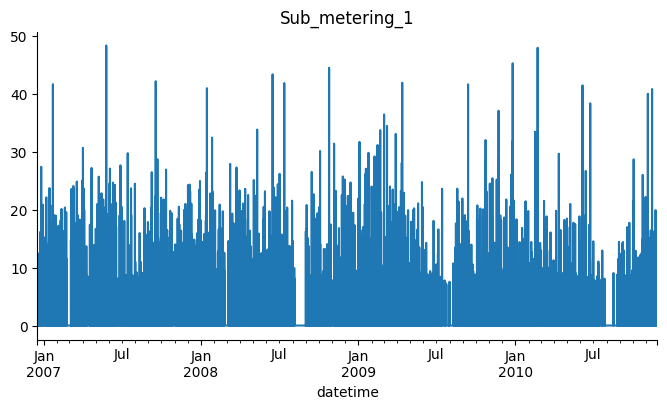

In [ ]:
data['Sub_metering_1'].plot(kind='line', figsize=(8, 4), title='Sub_metering_1')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
data.fillna(data.mean(), inplace=True)

In [ ]:
scaler = MinMaxScaler()
data[colonnes_to_convert] = scaler.fit_transform(data[colonnes_to_convert])

In [ ]:
y = data['Sub_metering_1']

In [ ]:
X = data.drop(columns=['Sub_metering_1'])

In [ ]:
test_size = 8309 / data.shape[0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

#### Entrainement

In [ ]:
# Convertir X_train en tableau numpy
X_train_array = X_train.values

# Appliquer reshape sur le tableau numpy
train_X = X_train_array.reshape((X_train_array.shape[0], 1, X_train_array.shape[1]))

# Convertir X_test en tableau numpy
X_test_array = X_test.values

# Appliquer reshape sur le tableau numpy
test_X = X_test_array.reshape((X_test_array.shape[0], 1, X_test_array.shape[1]))

In [ ]:
model = Sequential()
model.add(LSTM(100, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

history = model.fit(train_X, y_train, epochs=20, batch_size=32, validation_data=(test_X, y_test), verbose=2, shuffle=False)

Epoch 1/20
822/822 - 6s - loss: 0.0036 - val_loss: 0.0033 - 6s/epoch - 7ms/step
Epoch 2/20
822/822 - 3s - loss: 0.0034 - val_loss: 0.0033 - 3s/epoch - 4ms/step
Epoch 3/20
822/822 - 4s - loss: 0.0034 - val_loss: 0.0032 - 4s/epoch - 5ms/step
Epoch 4/20
822/822 - 3s - loss: 0.0033 - val_loss: 0.0032 - 3s/epoch - 3ms/step
Epoch 5/20
822/822 - 3s - loss: 0.0033 - val_loss: 0.0032 - 3s/epoch - 4ms/step
Epoch 6/20
822/822 - 3s - loss: 0.0033 - val_loss: 0.0032 - 3s/epoch - 3ms/step
Epoch 7/20
822/822 - 4s - loss: 0.0033 - val_loss: 0.0032 - 4s/epoch - 5ms/step
Epoch 8/20
822/822 - 3s - loss: 0.0032 - val_loss: 0.0032 - 3s/epoch - 4ms/step
Epoch 9/20
822/822 - 3s - loss: 0.0032 - val_loss: 0.0031 - 3s/epoch - 4ms/step
Epoch 10/20
822/822 - 3s - loss: 0.0032 - val_loss: 0.0031 - 3s/epoch - 4ms/step
Epoch 11/20
822/822 - 4s - loss: 0.0032 - val_loss: 0.0031 - 4s/epoch - 5ms/step
Epoch 12/20
822/822 - 3s - loss: 0.0032 - val_loss: 0.0031 - 3s/epoch - 4ms/step
Epoch 13/20
822/822 - 3s - loss: 0.00

In [ ]:
predictions = model.predict(test_X)

260/260 [==============================] - 1s 2ms/step


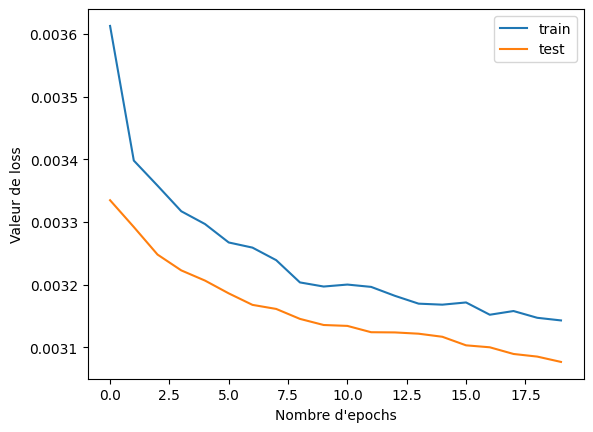

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('Valeur de loss')
plt.xlabel('Nombre d\'epochs')
plt.legend(['train', 'test'])

plt.show()

In [ ]:
index_str = y_test.index.strftime('%Y-%m-%d %H:%M:%S')

index_predictions = np.column_stack((index_str, predictions))
reels_predictions = np.column_stack((index_predictions, y_test))

df = pd.DataFrame(reels_predictions)

In [ ]:
df['datetime'] = pd.to_datetime(df[0])

# Séparer la colonne "datetime" en année, mois, jour et heure
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['day'] = df['datetime'].dt.day
df['hour'] = df['datetime'].dt.hour

means = df.groupby(['month', 'day', 'hour'])[[1, 2]].mean()
df_means = pd.DataFrame(means)

In [ ]:
saved_power = 0

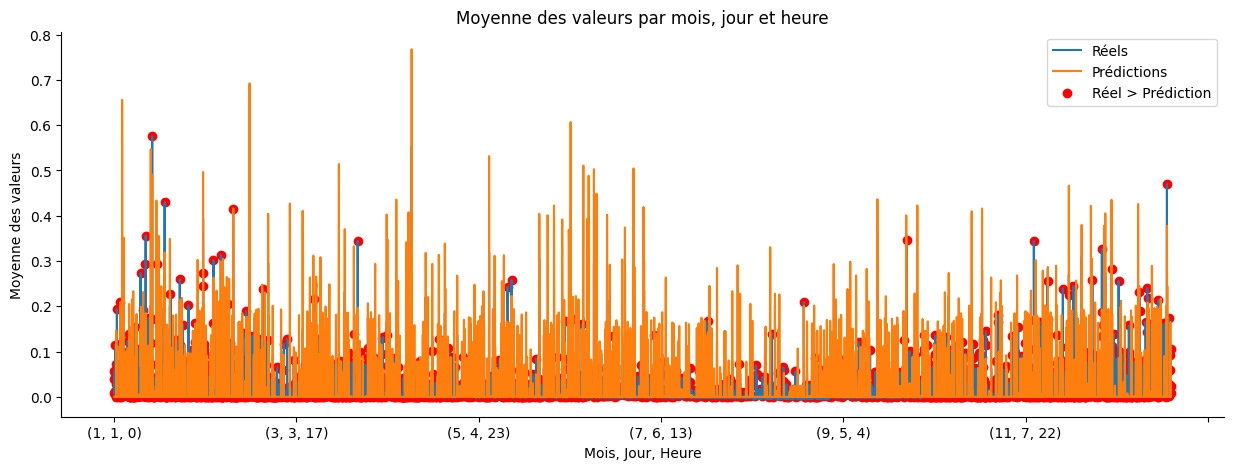

In [ ]:
df_means[1].plot(kind='line', figsize=(15, 5), label='Réels')
df_means[2].plot(kind='line', figsize=(15, 5), label='Prédictions')

df_means_reset = df_means.reset_index()

# Trouver les indices où la courbe réelle est supérieure à la prédiction
indices_sup = df_means_reset[1] > df_means_reset[2]

# pour calculer le saved power
diff = df_means_reset[1][indices_sup] - df_means_reset[2][indices_sup]
saved_power += diff.sum()

plt.scatter(df_means_reset.index[indices_sup], df_means_reset[1][indices_sup], color='red', label='Réel > Prédiction')

plt.title('Moyenne des valeurs par mois, jour et heure')
plt.xlabel('Mois, Jour, Heure')
plt.ylabel('Moyenne des valeurs')
plt.legend()
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()

In [ ]:
nb_alerts = sum(indices_sup)
print("Nombre d\'alertes :", nb_alerts)
print("Energie économisée :", saved_power)

Nombre d'alertes : 3647
Energie économisée : 70.53218369626644


#### Evaluation

In [ ]:
print("Score RMSE :", np.sqrt(mean_squared_error(y_test, predictions)))
print("Score MAE :", mean_absolute_error(y_test, predictions))

Score RMSE : 0.05543281494499107
Score MAE : 0.026631929093188976


### Sub Metering 2

#### Dataset & Pre-processing

In [ ]:
def prepare_data(link, colonne_target):
  data = pd.read_csv(link, delimiter=';')
  nb_lignes = data.shape[0]
  nb_colonnes = data.shape[1]
  labels = data.columns

  print("Nombre de lignes :", nb_lignes)
  print("Nombre de variables :", nb_colonnes)
  print(labels)

  colonnes_to_convert = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']
  data[colonnes_to_convert] = data[colonnes_to_convert].apply(pd.to_numeric, errors='coerce')

  nombre_lignes_nulles = data.isnull().any(axis=1).sum()
  pourcentage_lignes_nulles = (nombre_lignes_nulles / nb_lignes) * 100
  print("Pourcentage de lignes contenant des valeurs nulles:", pourcentage_lignes_nulles, "%")

  data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')
  data['Date'] = data['Date'].apply(lambda x: x.strftime('%Y-%m-%d'))

  data['datetime'] = pd.to_datetime(data['Date'] + ' ' + data['Time'])
  data_date = data['Date']
  data_time = data['Time']
  data_datetime = data['datetime']

  data.drop(['Date', 'Time'], axis=1, inplace=True)
  data = data.resample('H', on='datetime').mean()

  data.fillna(data.mean(), inplace=True)

  scaler = MinMaxScaler()
  data[colonnes_to_convert] = scaler.fit_transform(data[colonnes_to_convert])

  y = data[colonne_target]
  X = data.drop(columns=[colonne_target])

  test_size = 8309 / data.shape[0]
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

  return data, X_train, X_test, y_train, y_test

In [ ]:
data, X_train, X_test, y_train, y_test = prepare_data('/content/drive/MyDrive/Colab Notebooks/Master_Info/M2/Stage/Test/household_power_consumption.txt', 'Sub_metering_2')

<ipython-input-24-1a7f676fc0de>:2: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(link, delimiter=';')


Nombre de lignes : 2075259
Nombre de variables : 9
Index(['Date', 'Time', 'Global_active_power', 'Global_reactive_power',
       'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')
Pourcentage de lignes contenant des valeurs nulles: 1.2518437457686005 %


#### Entrainement

In [ ]:
def plot_loss(history):
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.ylabel('Valeur de loss')
  plt.xlabel('Nombre d\'epochs')
  plt.legend(['train', 'test'])

  plt.show()

In [ ]:
def plot_graph(df_means):
  saved_power = 0

  df_means[1].plot(kind='line', figsize=(15, 5), label='Réels')
  df_means[2].plot(kind='line', figsize=(15, 5), label='Prédictions')

  df_means_reset = df_means.reset_index()

  # Trouver les indices où la courbe réelle est supérieure à la prédiction
  indices_sup = df_means_reset[1] > df_means_reset[2]

  # pour calculer le saved power
  diff = df_means_reset[1][indices_sup] - df_means_reset[2][indices_sup]
  saved_power += diff.sum()

  plt.scatter(df_means_reset.index[indices_sup], df_means_reset[1][indices_sup], color='red', label='Réel > Prédiction')
  plt.title('Moyenne des valeurs par mois, jour et heure')
  plt.xlabel('Mois, Jour, Heure')
  plt.ylabel('Moyenne des valeurs')
  plt.legend()
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.show()

  nb_alerts = sum(indices_sup)
  print("Nombre d\'alertes :", nb_alerts)
  print("Energie économisée :", saved_power)

In [ ]:
def entrainement(X_train, X_test, y_train, y_test):

  # Convertir X_train en tableau numpy
  X_train_array = X_train.values

  # Appliquer reshape sur le tableau numpy
  train_X = X_train_array.reshape((X_train_array.shape[0], 1, X_train_array.shape[1]))

  # Convertir X_test en tableau numpy
  X_test_array = X_test.values

  # Appliquer reshape sur le tableau numpy
  test_X = X_test_array.reshape((X_test_array.shape[0], 1, X_test_array.shape[1]))

  model = Sequential()
  model.add(LSTM(100, input_shape=(train_X.shape[1], train_X.shape[2])))
  model.add(Dropout(0.2))
  model.add(Dense(1))
  model.compile(loss='mean_squared_error', optimizer='adam')

  history = model.fit(train_X, y_train, epochs=20, batch_size=32, validation_data=(test_X, y_test), verbose=2, shuffle=False)

  plot_loss(history)

  predictions = model.predict(test_X)

  index_str = y_test.index.strftime('%Y-%m-%d %H:%M:%S')
  index_predictions = np.column_stack((index_str, predictions))

  reels_predictions = np.column_stack((index_predictions, y_test))

  df = pd.DataFrame(reels_predictions)

  df['datetime'] = pd.to_datetime(df[0])
  df['year'] = df['datetime'].dt.year
  df['month'] = df['datetime'].dt.month
  df['day'] = df['datetime'].dt.day
  df['hour'] = df['datetime'].dt.hour

  means = df.groupby(['month', 'day', 'hour'])[[1, 2]].mean()
  df_means = pd.DataFrame(means)

  plot_graph(df_means)

  print("Score RMSE :", np.sqrt(mean_squared_error(y_test, predictions)))
  print("Score MAE :", mean_absolute_error(y_test, predictions))

Epoch 1/20
822/822 - 6s - loss: 0.0059 - val_loss: 0.0051 - 6s/epoch - 7ms/step
Epoch 2/20
822/822 - 4s - loss: 0.0056 - val_loss: 0.0051 - 4s/epoch - 5ms/step
Epoch 3/20
822/822 - 3s - loss: 0.0055 - val_loss: 0.0050 - 3s/epoch - 4ms/step
Epoch 4/20
822/822 - 3s - loss: 0.0055 - val_loss: 0.0050 - 3s/epoch - 4ms/step
Epoch 5/20
822/822 - 3s - loss: 0.0054 - val_loss: 0.0050 - 3s/epoch - 4ms/step
Epoch 6/20
822/822 - 4s - loss: 0.0054 - val_loss: 0.0050 - 4s/epoch - 5ms/step
Epoch 7/20
822/822 - 3s - loss: 0.0054 - val_loss: 0.0049 - 3s/epoch - 4ms/step
Epoch 8/20
822/822 - 3s - loss: 0.0054 - val_loss: 0.0049 - 3s/epoch - 4ms/step
Epoch 9/20
822/822 - 3s - loss: 0.0053 - val_loss: 0.0049 - 3s/epoch - 4ms/step
Epoch 10/20
822/822 - 4s - loss: 0.0052 - val_loss: 0.0049 - 4s/epoch - 5ms/step
Epoch 11/20
822/822 - 3s - loss: 0.0052 - val_loss: 0.0048 - 3s/epoch - 4ms/step
Epoch 12/20
822/822 - 3s - loss: 0.0052 - val_loss: 0.0048 - 3s/epoch - 4ms/step
Epoch 13/20
822/822 - 4s - loss: 0.00

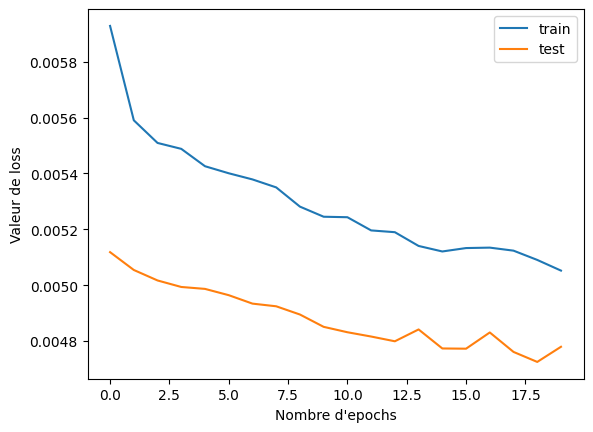

260/260 [==============================] - 1s 2ms/step


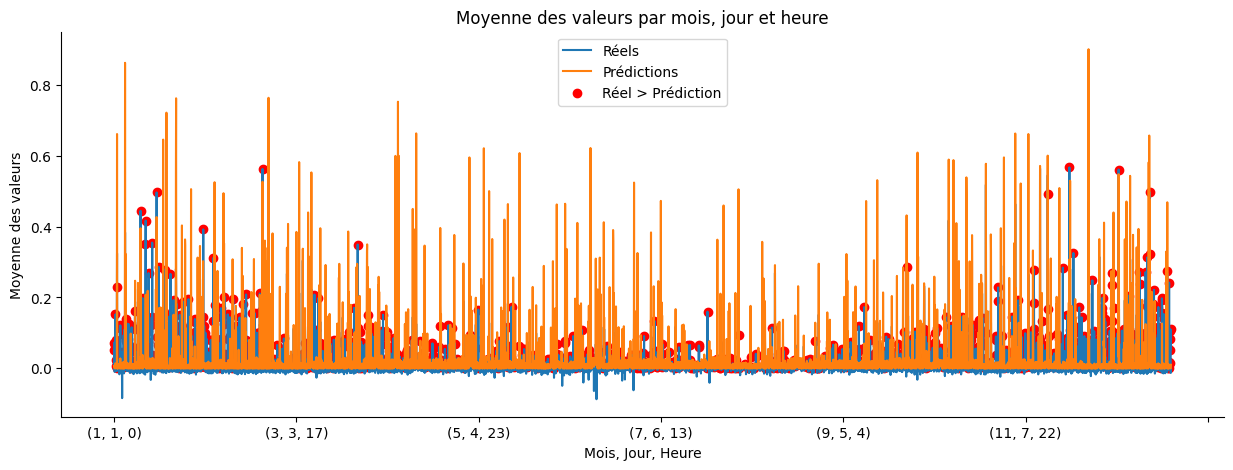

Nombre d'alertes : 1379
Energie économisée : 53.01475857264161
Score RMSE : 0.06913417764173546
Score MAE : 0.029654267628458915


In [ ]:
entrainement(X_train, X_test, y_train, y_test)

### Sub Metering 3

In [ ]:
data, X_train, X_test, y_train, y_test = prepare_data('/content/drive/MyDrive/Colab Notebooks/Master_Info/M2/Stage/Test/household_power_consumption.txt', 'Sub_metering_3')

<ipython-input-24-1a7f676fc0de>:2: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(link, delimiter=';')


Nombre de lignes : 2075259
Nombre de variables : 9
Index(['Date', 'Time', 'Global_active_power', 'Global_reactive_power',
       'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')
Pourcentage de lignes contenant des valeurs nulles: 1.2518437457686005 %


Epoch 1/20
822/822 - 7s - loss: 0.0606 - val_loss: 0.0459 - 7s/epoch - 9ms/step
Epoch 2/20
822/822 - 3s - loss: 0.0476 - val_loss: 0.0429 - 3s/epoch - 3ms/step
Epoch 3/20
822/822 - 3s - loss: 0.0458 - val_loss: 0.0414 - 3s/epoch - 4ms/step
Epoch 4/20
822/822 - 3s - loss: 0.0447 - val_loss: 0.0407 - 3s/epoch - 4ms/step
Epoch 5/20
822/822 - 4s - loss: 0.0442 - val_loss: 0.0403 - 4s/epoch - 5ms/step
Epoch 6/20
822/822 - 3s - loss: 0.0439 - val_loss: 0.0400 - 3s/epoch - 4ms/step
Epoch 7/20
822/822 - 3s - loss: 0.0435 - val_loss: 0.0398 - 3s/epoch - 4ms/step
Epoch 8/20
822/822 - 3s - loss: 0.0435 - val_loss: 0.0397 - 3s/epoch - 3ms/step
Epoch 9/20
822/822 - 4s - loss: 0.0431 - val_loss: 0.0395 - 4s/epoch - 4ms/step
Epoch 10/20
822/822 - 3s - loss: 0.0431 - val_loss: 0.0394 - 3s/epoch - 4ms/step
Epoch 11/20
822/822 - 3s - loss: 0.0430 - val_loss: 0.0394 - 3s/epoch - 4ms/step
Epoch 12/20
822/822 - 3s - loss: 0.0429 - val_loss: 0.0393 - 3s/epoch - 4ms/step
Epoch 13/20
822/822 - 4s - loss: 0.04

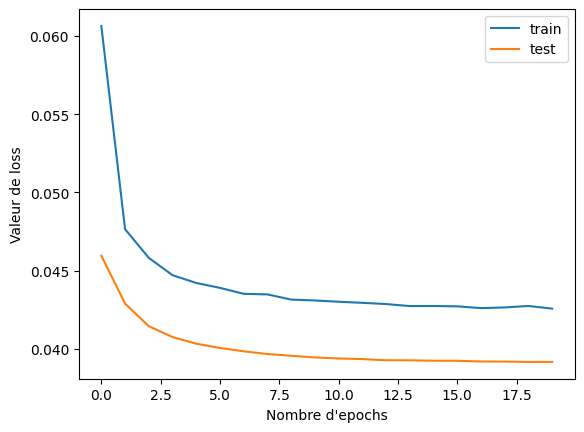

260/260 [==============================] - 1s 2ms/step


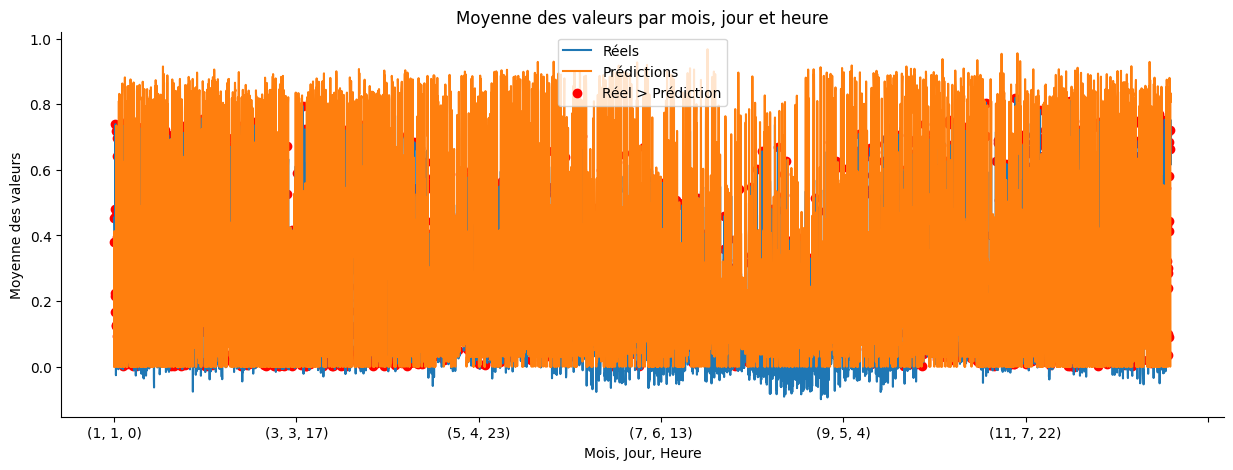

Nombre d'alertes : 2476
Energie économisée : 375.3699083290431
Score RMSE : 0.19787915102302522
Score MAE : 0.14085785258152478


In [ ]:
entrainement(X_train, X_test, y_train, y_test)

## Distributed system

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Master_Info/M2/Stage/Test/household_power_consumption.txt', delimiter=';')
nb_lignes = data.shape[0]
nb_colonnes = data.shape[1]
labels = data.columns

print("Nombre de lignes :", nb_lignes)
print("Nombre de variables :", nb_colonnes)
print(labels)

colonnes_to_convert = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']
data[colonnes_to_convert] = data[colonnes_to_convert].apply(pd.to_numeric, errors='coerce')

nombre_lignes_nulles = data.isnull().any(axis=1).sum()
pourcentage_lignes_nulles = (nombre_lignes_nulles / nb_lignes) * 100
print("Pourcentage de lignes contenant des valeurs nulles:", pourcentage_lignes_nulles, "%")

data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')
data['Date'] = data['Date'].apply(lambda x: x.strftime('%Y-%m-%d'))

data['datetime'] = pd.to_datetime(data['Date'] + ' ' + data['Time'])
data_date = data['Date']
data_time = data['Time']
data_datetime = data['datetime']

data.drop(['Date', 'Time'], axis=1, inplace=True)
data = data.resample('H', on='datetime').mean()

data.fillna(data.mean(), inplace=True)

scaler = MinMaxScaler()
data[colonnes_to_convert] = scaler.fit_transform(data[colonnes_to_convert])

colonnes_target = ['Global_active_power', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']

y = data[colonnes_target]
X = data.drop(columns=colonnes_target)

test_size = 8309 / data.shape[0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

<ipython-input-8-fdec276d0392>:1: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Master_Info/M2/Stage/Test/household_power_consumption.txt', delimiter=';')


Nombre de lignes : 2075259
Nombre de variables : 9
Index(['Date', 'Time', 'Global_active_power', 'Global_reactive_power',
       'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')
Pourcentage de lignes contenant des valeurs nulles: 1.2518437457686005 %


Epoch 1/20
822/822 - 6s - loss: 0.0217 - val_loss: 0.0166 - 6s/epoch - 8ms/step
Epoch 2/20
822/822 - 2s - loss: 0.0171 - val_loss: 0.0157 - 2s/epoch - 3ms/step
Epoch 3/20
822/822 - 3s - loss: 0.0163 - val_loss: 0.0148 - 3s/epoch - 3ms/step
Epoch 4/20
822/822 - 3s - loss: 0.0155 - val_loss: 0.0142 - 3s/epoch - 3ms/step
Epoch 5/20
822/822 - 4s - loss: 0.0152 - val_loss: 0.0140 - 4s/epoch - 5ms/step
Epoch 6/20
822/822 - 3s - loss: 0.0151 - val_loss: 0.0139 - 3s/epoch - 3ms/step
Epoch 7/20
822/822 - 3s - loss: 0.0150 - val_loss: 0.0139 - 3s/epoch - 3ms/step
Epoch 8/20
822/822 - 3s - loss: 0.0149 - val_loss: 0.0138 - 3s/epoch - 3ms/step
Epoch 9/20
822/822 - 3s - loss: 0.0149 - val_loss: 0.0138 - 3s/epoch - 4ms/step
Epoch 10/20
822/822 - 3s - loss: 0.0148 - val_loss: 0.0138 - 3s/epoch - 4ms/step
Epoch 11/20
822/822 - 3s - loss: 0.0148 - val_loss: 0.0137 - 3s/epoch - 3ms/step
Epoch 12/20
822/822 - 2s - loss: 0.0148 - val_loss: 0.0137 - 2s/epoch - 3ms/step
Epoch 13/20
822/822 - 3s - loss: 0.01

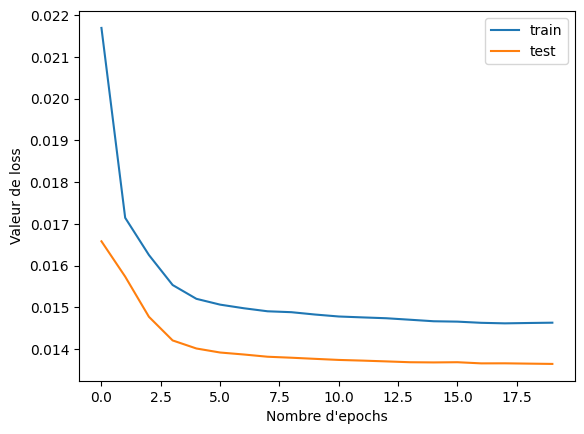

260/260 [==============================] - 1s 2ms/step


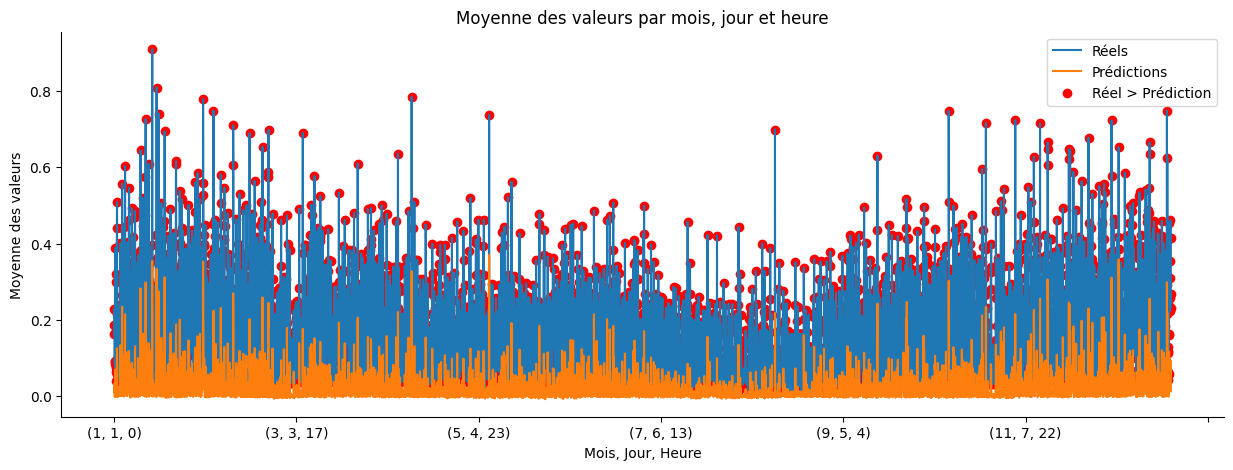

Nombre d'alertes : 5798
Energie économisée : 795.7675121177454
Score RMSE : 0.11680992733291576
Score MAE : 0.05550361561726566


In [ ]:
# Convertir X_train en tableau numpy
X_train_array = X_train.values

# Appliquer reshape sur le tableau numpy
train_X = X_train_array.reshape((X_train_array.shape[0], 1, X_train_array.shape[1]))

# Convertir X_test en tableau numpy
X_test_array = X_test.values

# Appliquer reshape sur le tableau numpy
test_X = X_test_array.reshape((X_test_array.shape[0], 1, X_test_array.shape[1]))

model = Sequential()
model.add(LSTM(100, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(4))
model.compile(loss='mean_squared_error', optimizer='adam')

history = model.fit(train_X, y_train, epochs=20, batch_size=32, validation_data=(test_X, y_test), verbose=2, shuffle=False)

plot_loss(history)

predictions = model.predict(test_X)

index_str = y_test.index.strftime('%Y-%m-%d %H:%M:%S')
index_predictions = np.column_stack((index_str, predictions))

reels_predictions = np.column_stack((index_predictions, y_test))

df = pd.DataFrame(reels_predictions)

df['datetime'] = pd.to_datetime(df[0])
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['day'] = df['datetime'].dt.day
df['hour'] = df['datetime'].dt.hour

means = df.groupby(['month', 'day', 'hour'])[[1, 2]].mean()
df_means = pd.DataFrame(means)

plot_graph(df_means)

print("Score RMSE :", np.sqrt(mean_squared_error(y_test, predictions)))
print("Score MAE :", mean_absolute_error(y_test, predictions))

### Global Active Power

Epoch 1/20
822/822 - 5s - loss: 0.0385 - val_loss: 0.0013 - 5s/epoch - 6ms/step
Epoch 2/20
822/822 - 3s - loss: 0.0371 - val_loss: 0.0012 - 3s/epoch - 4ms/step
Epoch 3/20
822/822 - 2s - loss: 0.0370 - val_loss: 0.0011 - 2s/epoch - 3ms/step
Epoch 4/20
822/822 - 2s - loss: 0.0370 - val_loss: 0.0012 - 2s/epoch - 3ms/step
Epoch 5/20
822/822 - 2s - loss: 0.0369 - val_loss: 0.0014 - 2s/epoch - 3ms/step
Epoch 6/20
822/822 - 2s - loss: 0.0369 - val_loss: 0.0014 - 2s/epoch - 3ms/step
Epoch 7/20
822/822 - 3s - loss: 0.0369 - val_loss: 0.0013 - 3s/epoch - 4ms/step
Epoch 8/20
822/822 - 3s - loss: 0.0369 - val_loss: 0.0014 - 3s/epoch - 3ms/step
Epoch 9/20
822/822 - 3s - loss: 0.0369 - val_loss: 0.0016 - 3s/epoch - 3ms/step
Epoch 10/20
822/822 - 3s - loss: 0.0369 - val_loss: 0.0015 - 3s/epoch - 3ms/step
Epoch 11/20
822/822 - 2s - loss: 0.0369 - val_loss: 0.0015 - 2s/epoch - 3ms/step
Epoch 12/20
822/822 - 3s - loss: 0.0369 - val_loss: 0.0015 - 3s/epoch - 4ms/step
Epoch 13/20
822/822 - 3s - loss: 0.03

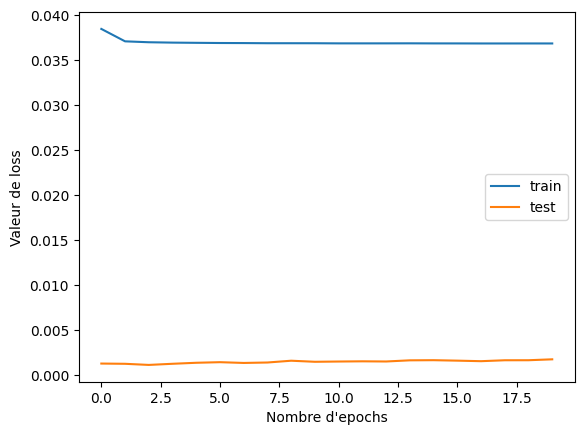

260/260 [==============================] - 1s 2ms/step


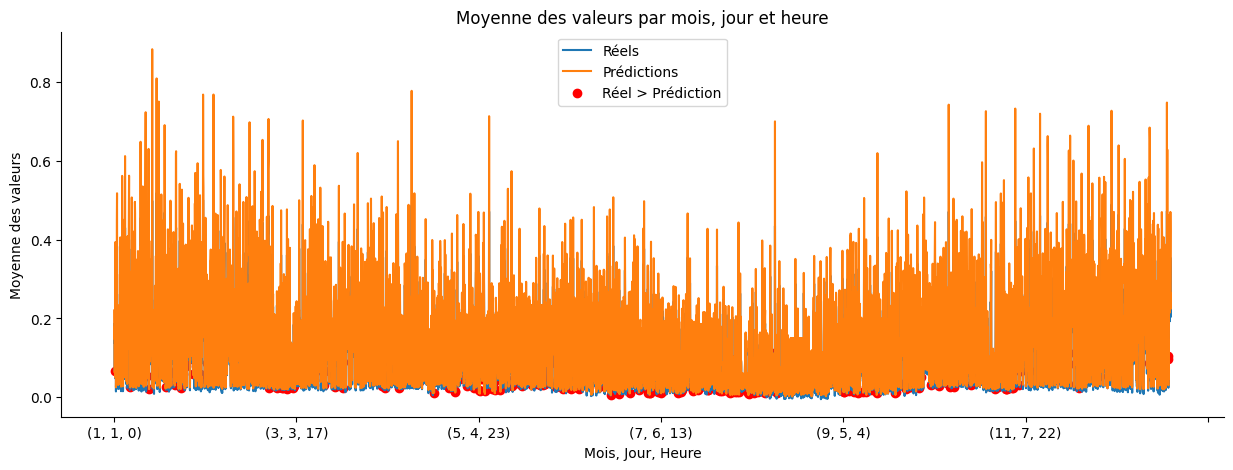

Nombre d'alertes : 406
Energie économisée : 1.3078372569665482
Score RMSE : 0.04173222473218983
Score MAE : 0.023267667402353583


In [ ]:
# Convertir X_train en tableau numpy
X_train_array = X_train.values

# Appliquer reshape sur le tableau numpy
train_X = X_train_array.reshape((X_train_array.shape[0], 1, X_train_array.shape[1]))

# Convertir X_test en tableau numpy
X_test_array = X_test.values

# Appliquer reshape sur le tableau numpy
test_X = X_test_array.reshape((X_test_array.shape[0], 1, X_test_array.shape[1]))

model = Sequential()
model.add(LSTM(100, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

history = model.fit(train_X, y_train, epochs=20, batch_size=32, validation_data=(test_X, y_test['Global_active_power']), verbose=2, shuffle=False)

plot_loss(history)

predictions = model.predict(test_X)

# Convertir l'index en une liste de chaînes de caractères
index_str = y_test.index.strftime('%Y-%m-%d %H:%M:%S')

# Concaténer les index et les prédictions
index_predictions = np.column_stack((index_str, predictions))

reels_predictions = np.column_stack((index_predictions, y_test['Global_active_power']))

df = pd.DataFrame(reels_predictions)

df['datetime'] = pd.to_datetime(df[0])
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['day'] = df['datetime'].dt.day
df['hour'] = df['datetime'].dt.hour

means = df.groupby(['month', 'day', 'hour'])[[1, 2]].mean()
df_means = pd.DataFrame(means)

plot_graph(df_means)

print("Score RMSE :", np.sqrt(mean_squared_error(y_test['Global_active_power'], predictions)))
print("Score MAE :", mean_absolute_error(y_test['Global_active_power'], predictions))

### Sub Metering 1

Epoch 1/20
822/822 - 8s - loss: 0.0388 - val_loss: 0.0212 - 8s/epoch - 9ms/step
Epoch 2/20
822/822 - 2s - loss: 0.0371 - val_loss: 0.0209 - 2s/epoch - 3ms/step
Epoch 3/20
822/822 - 3s - loss: 0.0370 - val_loss: 0.0212 - 3s/epoch - 4ms/step
Epoch 4/20
822/822 - 3s - loss: 0.0370 - val_loss: 0.0211 - 3s/epoch - 4ms/step
Epoch 5/20
822/822 - 3s - loss: 0.0370 - val_loss: 0.0212 - 3s/epoch - 3ms/step
Epoch 6/20
822/822 - 3s - loss: 0.0369 - val_loss: 0.0214 - 3s/epoch - 3ms/step
Epoch 7/20
822/822 - 3s - loss: 0.0369 - val_loss: 0.0209 - 3s/epoch - 3ms/step
Epoch 8/20
822/822 - 3s - loss: 0.0369 - val_loss: 0.0214 - 3s/epoch - 4ms/step
Epoch 9/20
822/822 - 3s - loss: 0.0369 - val_loss: 0.0211 - 3s/epoch - 3ms/step
Epoch 10/20
822/822 - 3s - loss: 0.0369 - val_loss: 0.0210 - 3s/epoch - 3ms/step
Epoch 11/20
822/822 - 3s - loss: 0.0369 - val_loss: 0.0210 - 3s/epoch - 3ms/step
Epoch 12/20
822/822 - 2s - loss: 0.0369 - val_loss: 0.0209 - 2s/epoch - 3ms/step
Epoch 13/20
822/822 - 3s - loss: 0.03

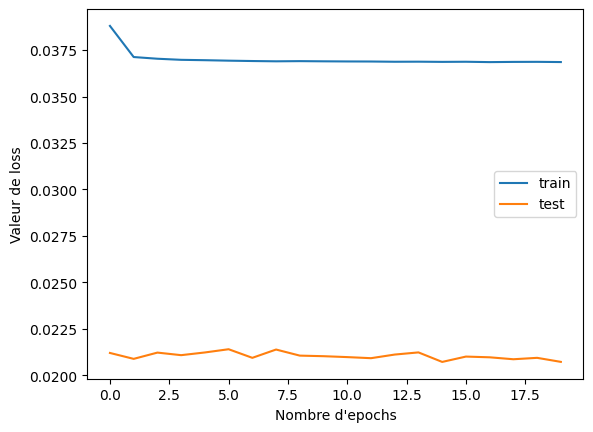

260/260 [==============================] - 1s 2ms/step


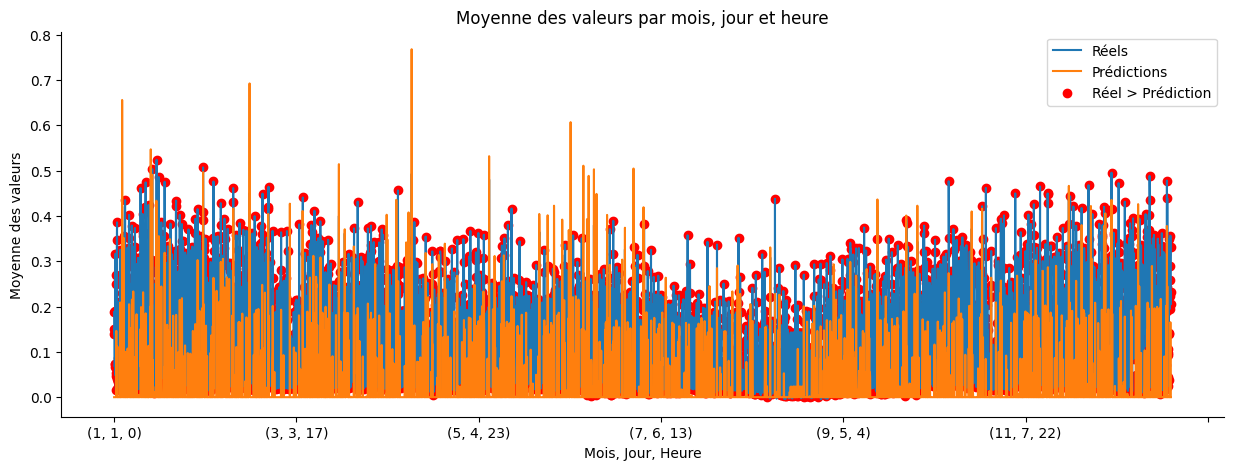

Nombre d'alertes : 5623
Energie économisée : 614.4246451998333
Score RMSE : 0.14394973719469017
Score MAE : 0.10868840478676063


In [ ]:
# Convertir X_train en tableau numpy
X_train_array = X_train.values

# Appliquer reshape sur le tableau numpy
train_X = X_train_array.reshape((X_train_array.shape[0], 1, X_train_array.shape[1]))

# Convertir X_test en tableau numpy
X_test_array = X_test.values

# Appliquer reshape sur le tableau numpy
test_X = X_test_array.reshape((X_test_array.shape[0], 1, X_test_array.shape[1]))

model = Sequential()
model.add(LSTM(100, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

history = model.fit(train_X, y_train, epochs=20, batch_size=32, validation_data=(test_X, y_test['Sub_metering_1']), verbose=2, shuffle=False)

plot_loss(history)

predictions = model.predict(test_X)
index_str = y_test.index.strftime('%Y-%m-%d %H:%M:%S')
index_predictions = np.column_stack((index_str, predictions))

reels_predictions = np.column_stack((index_predictions, y_test['Sub_metering_1']))

df = pd.DataFrame(reels_predictions)

df['datetime'] = pd.to_datetime(df[0])
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['day'] = df['datetime'].dt.day
df['hour'] = df['datetime'].dt.hour

means = df.groupby(['month', 'day', 'hour'])[[1, 2]].mean()
df_means = pd.DataFrame(means)

plot_graph(df_means)

print("Score RMSE :", np.sqrt(mean_squared_error(y_test['Sub_metering_1'], predictions)))
print("Score MAE :", mean_absolute_error(y_test['Sub_metering_1'], predictions))

### Sub_metering_2

Epoch 1/20
822/822 - 10s - loss: 0.0384 - val_loss: 0.0222 - 10s/epoch - 12ms/step
Epoch 2/20
822/822 - 3s - loss: 0.0371 - val_loss: 0.0226 - 3s/epoch - 3ms/step
Epoch 3/20
822/822 - 3s - loss: 0.0370 - val_loss: 0.0228 - 3s/epoch - 3ms/step
Epoch 4/20
822/822 - 3s - loss: 0.0369 - val_loss: 0.0232 - 3s/epoch - 4ms/step
Epoch 5/20
822/822 - 3s - loss: 0.0369 - val_loss: 0.0227 - 3s/epoch - 4ms/step
Epoch 6/20
822/822 - 3s - loss: 0.0369 - val_loss: 0.0230 - 3s/epoch - 3ms/step
Epoch 7/20
822/822 - 3s - loss: 0.0369 - val_loss: 0.0228 - 3s/epoch - 3ms/step
Epoch 8/20
822/822 - 3s - loss: 0.0369 - val_loss: 0.0227 - 3s/epoch - 3ms/step
Epoch 9/20
822/822 - 3s - loss: 0.0369 - val_loss: 0.0226 - 3s/epoch - 4ms/step
Epoch 10/20
822/822 - 3s - loss: 0.0369 - val_loss: 0.0227 - 3s/epoch - 3ms/step
Epoch 11/20
822/822 - 3s - loss: 0.0369 - val_loss: 0.0226 - 3s/epoch - 3ms/step
Epoch 12/20
822/822 - 2s - loss: 0.0369 - val_loss: 0.0225 - 2s/epoch - 3ms/step
Epoch 13/20
822/822 - 3s - loss: 0

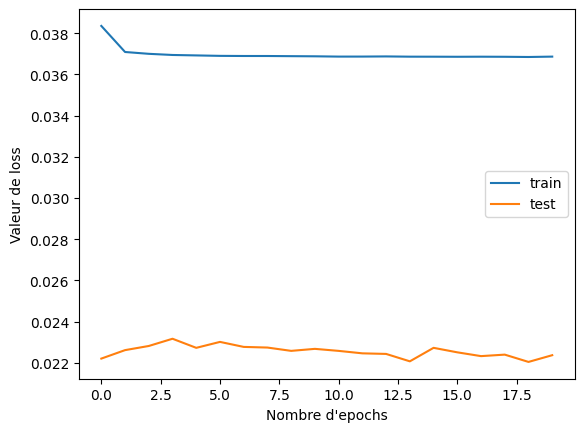

260/260 [==============================] - 1s 2ms/step


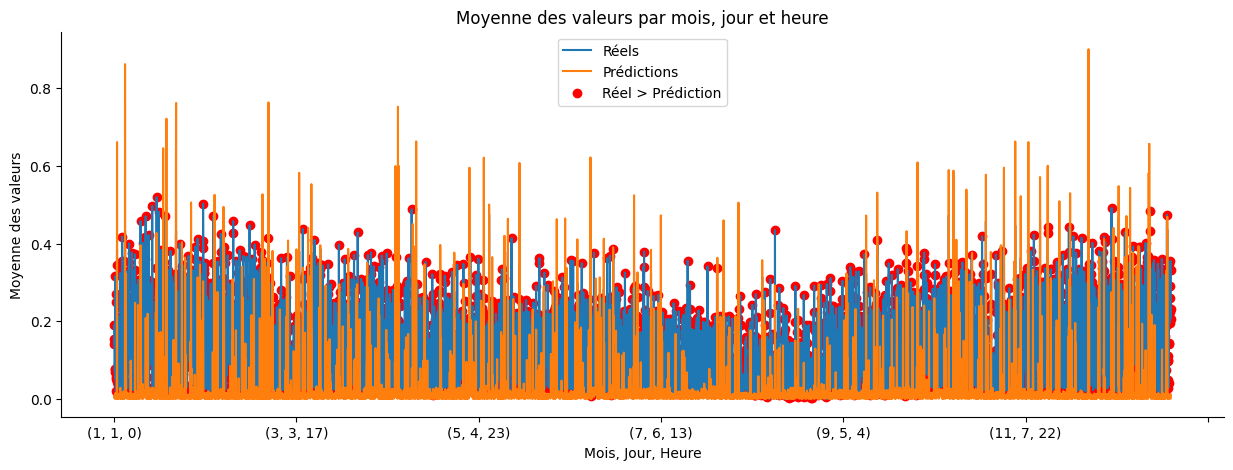

Nombre d'alertes : 5506
Energie économisée : 618.6200369734488
Score RMSE : 0.14955234092288247
Score MAE : 0.1118330165095113


In [ ]:
# Convertir X_train en tableau numpy
X_train_array = X_train.values

# Appliquer reshape sur le tableau numpy
train_X = X_train_array.reshape((X_train_array.shape[0], 1, X_train_array.shape[1]))

# Convertir X_test en tableau numpy
X_test_array = X_test.values

# Appliquer reshape sur le tableau numpy
test_X = X_test_array.reshape((X_test_array.shape[0], 1, X_test_array.shape[1]))

model = Sequential()
model.add(LSTM(100, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

history = model.fit(train_X, y_train, epochs=20, batch_size=32, validation_data=(test_X, y_test['Sub_metering_2']), verbose=2, shuffle=False)

plot_loss(history)

predictions = model.predict(test_X)
index_str = y_test.index.strftime('%Y-%m-%d %H:%M:%S')
index_predictions = np.column_stack((index_str, predictions))

reels_predictions = np.column_stack((index_predictions, y_test['Sub_metering_2']))

df = pd.DataFrame(reels_predictions)

df['datetime'] = pd.to_datetime(df[0])
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['day'] = df['datetime'].dt.day
df['hour'] = df['datetime'].dt.hour

means = df.groupby(['month', 'day', 'hour'])[[1, 2]].mean()
df_means = pd.DataFrame(means)

plot_graph(df_means)

print("Score RMSE :", np.sqrt(mean_squared_error(y_test['Sub_metering_2'], predictions)))
print("Score MAE :", mean_absolute_error(y_test['Sub_metering_2'], predictions))

### Sub_metering_3

Epoch 1/20
822/822 - 8s - loss: 0.0386 - val_loss: 0.1036 - 8s/epoch - 10ms/step
Epoch 2/20
822/822 - 3s - loss: 0.0371 - val_loss: 0.1020 - 3s/epoch - 3ms/step
Epoch 3/20
822/822 - 4s - loss: 0.0370 - val_loss: 0.1017 - 4s/epoch - 4ms/step
Epoch 4/20
822/822 - 3s - loss: 0.0369 - val_loss: 0.0998 - 3s/epoch - 3ms/step
Epoch 5/20
822/822 - 3s - loss: 0.0369 - val_loss: 0.1001 - 3s/epoch - 3ms/step
Epoch 6/20
822/822 - 3s - loss: 0.0369 - val_loss: 0.1007 - 3s/epoch - 3ms/step
Epoch 7/20
822/822 - 3s - loss: 0.0369 - val_loss: 0.1005 - 3s/epoch - 4ms/step
Epoch 8/20
822/822 - 3s - loss: 0.0369 - val_loss: 0.1004 - 3s/epoch - 4ms/step
Epoch 9/20
822/822 - 2s - loss: 0.0369 - val_loss: 0.1012 - 2s/epoch - 3ms/step
Epoch 10/20
822/822 - 3s - loss: 0.0369 - val_loss: 0.1009 - 3s/epoch - 3ms/step
Epoch 11/20
822/822 - 3s - loss: 0.0369 - val_loss: 0.1008 - 3s/epoch - 3ms/step
Epoch 12/20
822/822 - 4s - loss: 0.0369 - val_loss: 0.1005 - 4s/epoch - 4ms/step
Epoch 13/20
822/822 - 3s - loss: 0.0

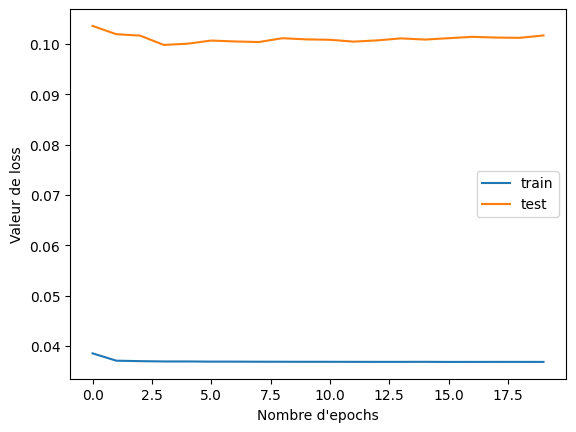

260/260 [==============================] - 1s 2ms/step


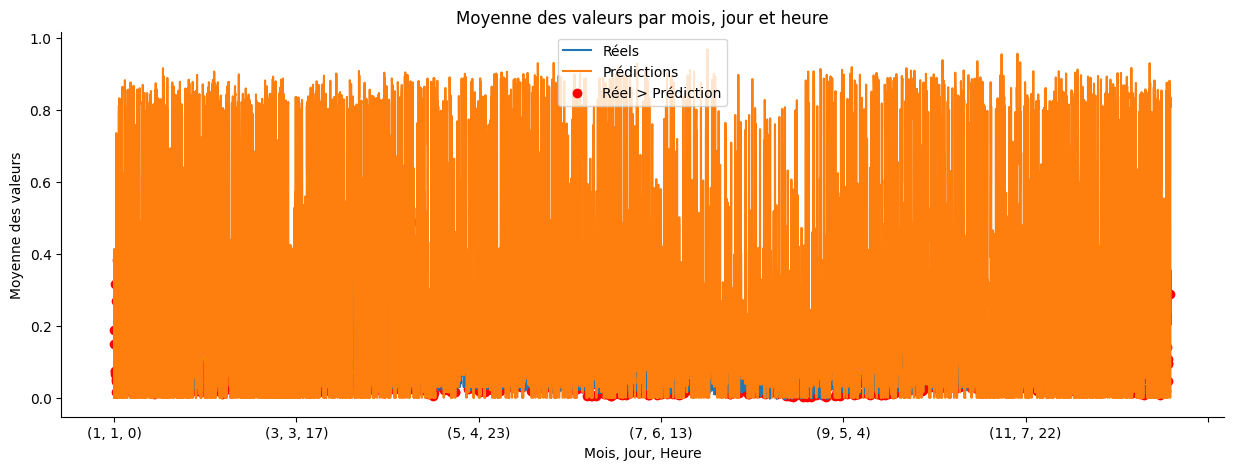

Nombre d'alertes : 1750
Energie économisée : 109.56375399510864
Score RMSE : 0.3189093838235641
Score MAE : 0.21707473902081928


In [ ]:
# Convertir X_train en tableau numpy
X_train_array = X_train.values

# Appliquer reshape sur le tableau numpy
train_X = X_train_array.reshape((X_train_array.shape[0], 1, X_train_array.shape[1]))

# Convertir X_test en tableau numpy
X_test_array = X_test.values

# Appliquer reshape sur le tableau numpy
test_X = X_test_array.reshape((X_test_array.shape[0], 1, X_test_array.shape[1]))

model = Sequential()
model.add(LSTM(100, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

history = model.fit(train_X, y_train, epochs=20, batch_size=32, validation_data=(test_X, y_test['Sub_metering_3']), verbose=2, shuffle=False)

plot_loss(history)

predictions = model.predict(test_X)

# Convertir l'index en une liste de chaînes de caractères
index_str = y_test.index.strftime('%Y-%m-%d %H:%M:%S')

# Concaténer les index et les prédictions
index_predictions = np.column_stack((index_str, predictions))

reels_predictions = np.column_stack((index_predictions, y_test['Sub_metering_3']))

df = pd.DataFrame(reels_predictions)

df['datetime'] = pd.to_datetime(df[0])
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['day'] = df['datetime'].dt.day
df['hour'] = df['datetime'].dt.hour

means = df.groupby(['month', 'day', 'hour'])[[1, 2]].mean()
df_means = pd.DataFrame(means)

plot_graph(df_means)

print("Score RMSE :", np.sqrt(mean_squared_error(y_test['Sub_metering_3'], predictions)))
print("Score MAE :", mean_absolute_error(y_test['Sub_metering_3'], predictions))

## Resume

### Alerts

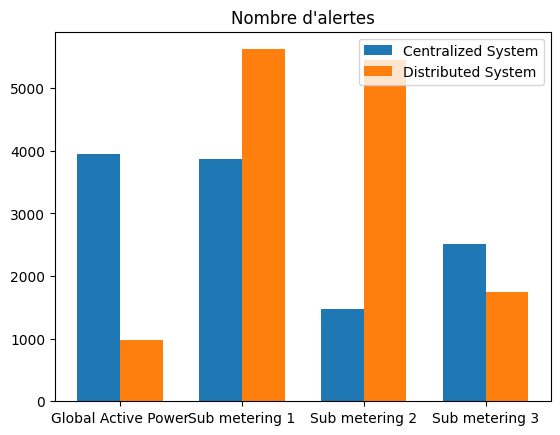

In [ ]:
# Nombre d'alertes
variables = ['Global Active Power', 'Sub metering 1', 'Sub metering 2', 'Sub metering 3']
alerts_centralized = [3947, 3874, 1467, 2511]
alerts_distributed = [985, 5623, 5454, 1750]

bar_width = 0.35
x = np.arange(len(variables))

plt.bar(x - bar_width/2, alerts_centralized, bar_width, label='Centralized System')
plt.bar(x + bar_width/2, alerts_distributed, bar_width, label='Distributed System')

plt.title('Nombre d\'alertes')
plt.xticks(x, variables)
plt.legend()
plt.show()

### Saved Power

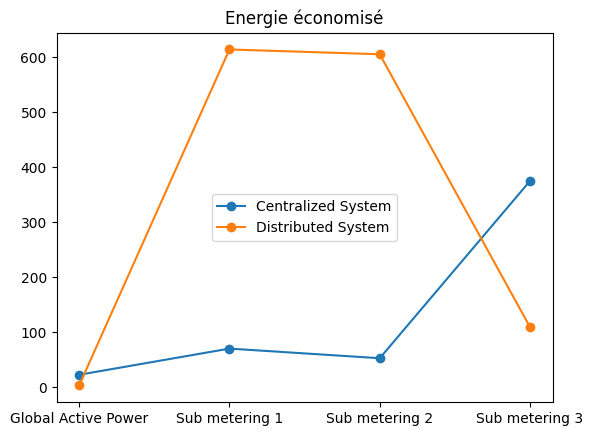

In [19]:
# Energie économisé
variables = ['Global Active Power', 'Sub metering 1', 'Sub metering 2', 'Sub metering 3']
saved_power_centralized = [22.909257997038367, 70.53218369626644, 53.01475857264161, 375.3699083290431]
saved_power_distributed = [3.4550108155254557, 614.4246451998333, 605.77454969868, 109.56375399510864]

x = np.arange(len(variables))

plt.plot(x, saved_power_centralized, marker='o', label='Centralized System')
plt.plot(x, saved_power_distributed, marker='o', label='Distributed System')

plt.title('Energie économisé')
plt.xticks(x, variables)
plt.legend()
plt.show()

### Errors

In [ ]:
total_rmse_centralized = [['Global Active Power', 'Sub metering 1', 'Sub metering 2', 'Sub metering 3'],
              [0.004277321824065124, 0.05543281494499107, 0.06913417764173546, 0.19787915102302522] ]

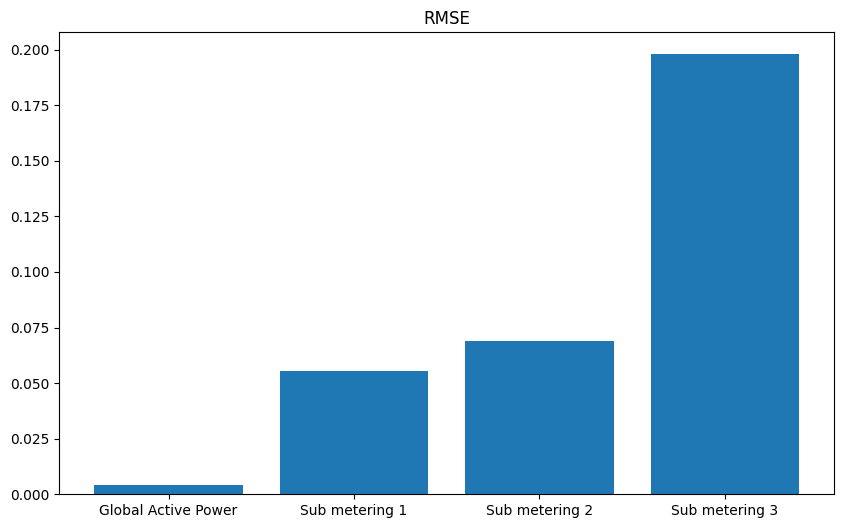

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(total_rmse_centralized[0], total_rmse_centralized[1])
plt.title('RMSE')
plt.show()

In [ ]:
total_mae_centralized = [['Global Active Power', 'Sub metering 1', 'Sub metering 2', 'Sub metering 3'],
              [0.0033791376618009477, 0.026631929093188976, 0.029654267628458915, 0.14085785258152478] ]

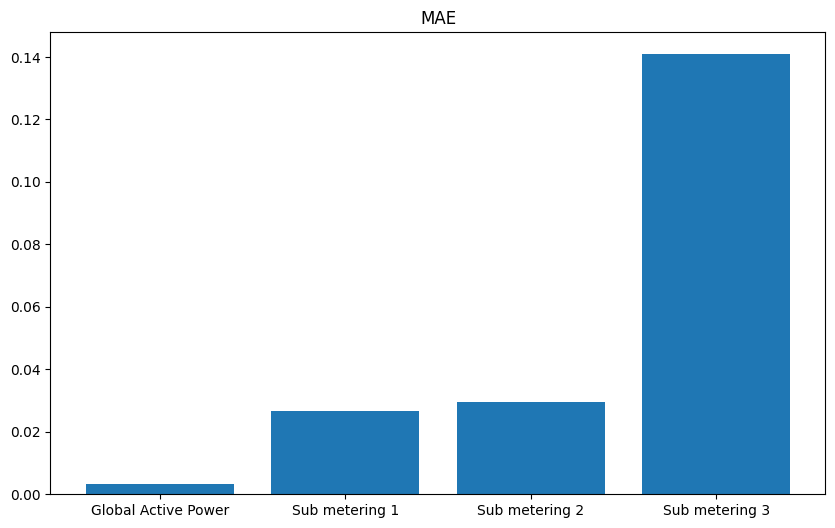

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(total_mae_centralized[0], total_mae_centralized[1])
plt.title('MAE')
plt.show()

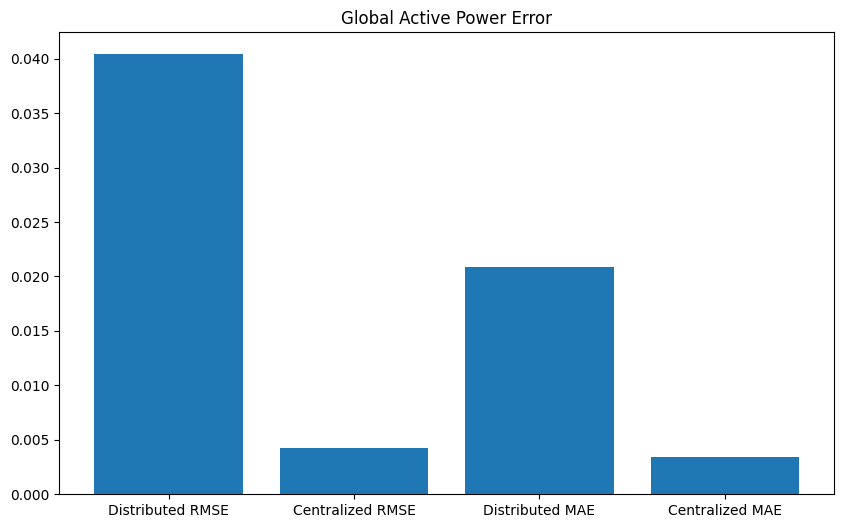

In [ ]:
# Global Active Power Error
Global_Active_Power_error = [['Distributed RMSE', 'Centralized RMSE', 'Distributed MAE', 'Centralized MAE'],
                            [0.04039923584811742, 0.004277321824065124, 0.020895397848218297, 0.0033791376618009477]]

plt.figure(figsize=(10, 6))
plt.bar(Global_Active_Power_error[0], Global_Active_Power_error[1])
plt.title('Global Active Power Error')
plt.show()

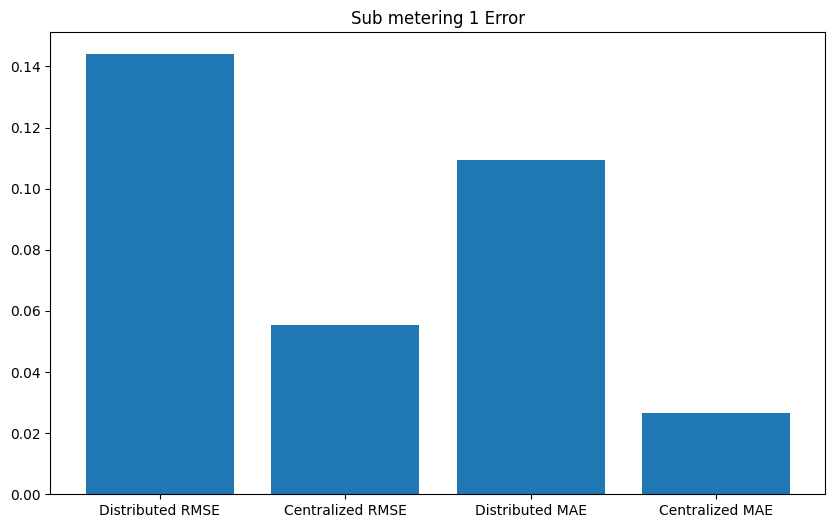

In [ ]:
# Sub metering 1 Error
Sub_metering_1_error = [['Distributed RMSE', 'Centralized RMSE', 'Distributed MAE', 'Centralized MAE'],
                        [0.14394973719469017, 0.05543281494499107, 0.10868840478676063, 0.026631929093188976]]

plt.figure(figsize=(10, 6))
plt.bar(Sub_metering_1_error[0], Sub_metering_1_error[1])
plt.title('Sub metering 1 Error')
plt.show()

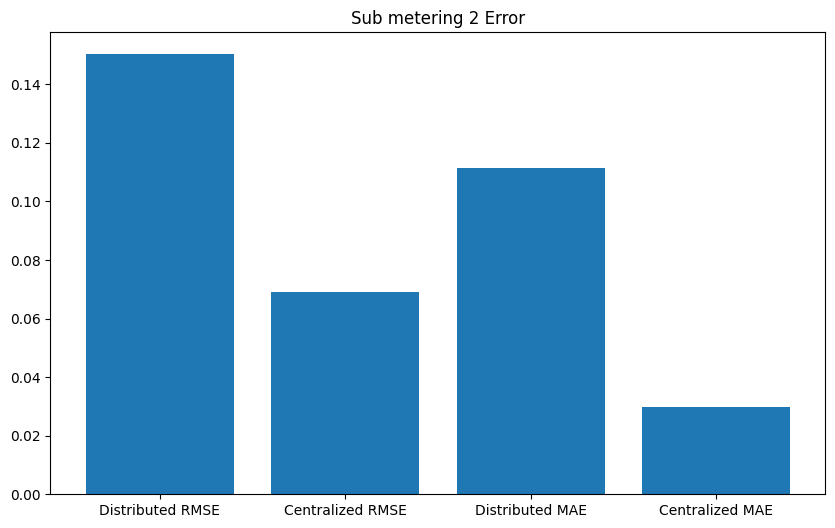

In [ ]:
# Sub metering 2 Error
Sub_metering_2_error = [['Distributed RMSE', 'Centralized RMSE', 'Distributed MAE', 'Centralized MAE'],
                        [0.1481942391781998, 0.06913417764173546, 0.10979637010820768, 0.029654267628458915]]

plt.figure(figsize=(10, 6))
plt.bar(Sub_metering_2_error[0], Sub_metering_2_error[1])
plt.title('Sub metering 2 Error')
plt.show()

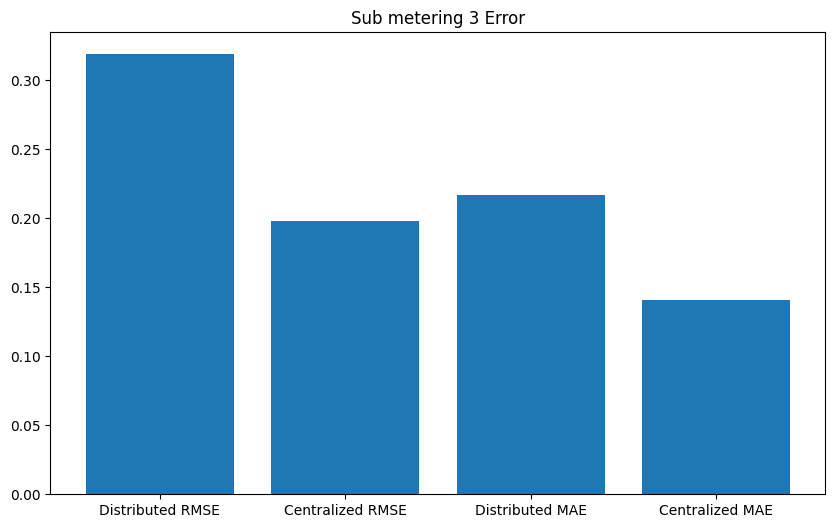

In [21]:
# Sub metering 3 Error
Sub_metering_3_error = [['Distributed RMSE', 'Centralized RMSE', 'Distributed MAE', 'Centralized MAE'],
                    [0.3189093838235641, 0.19787915102302522, 0.21707473902081928, 0.14085785258152478]]

plt.figure(figsize=(10, 6))
plt.bar(Sub_metering_3_error[0], Sub_metering_3_error[1])
plt.title('Sub metering 3 Error')
plt.show()